In [ ]:
import pandas as pd
fromage=pd.read_table(r"fromage1.txt",sep="\t",header=0,index_col=0)
print(fromage.describe())

In [21]:

from ydata_profiling import ProfileReport
report = ProfileReport(fromage)
report.to_file("fromage_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 313.41it/s]


             calories    sodium   calcium   lipides   retinol   folates  \
calories     1.000000  0.447224  0.433400  0.983634 -0.042885 -0.321098   
sodium       0.447224  1.000000  0.005959  0.483344  0.144328  0.136561   
calcium      0.433400  0.005959  1.000000  0.341132 -0.289547 -0.637503   
lipides      0.983634  0.483344  0.341132  1.000000 -0.018353 -0.276543   
retinol     -0.042885  0.144328 -0.289547 -0.018353  1.000000  0.517266   
folates     -0.321098  0.136561 -0.637503 -0.276543  0.517266  1.000000   
proteines    0.885372  0.275998  0.610705  0.809303 -0.039173 -0.352871   
cholesterol  0.961923  0.332994  0.428446  0.955444 -0.086972 -0.366346   
magnesium    0.745443  0.031113  0.710480  0.689860 -0.099801 -0.447067   

             proteines  cholesterol  magnesium  
calories      0.885372     0.961923   0.745443  
sodium        0.275998     0.332994   0.031113  
calcium       0.610705     0.428446   0.710480  
lipides       0.809303     0.955444   0.689860  
reti

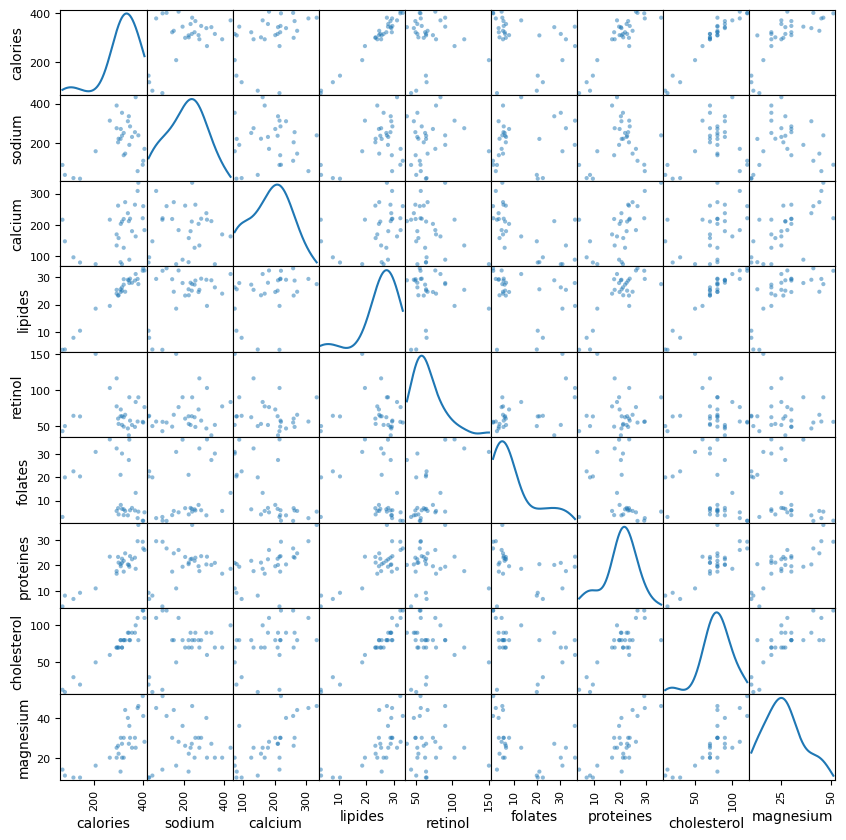

In [9]:
pd.plotting.scatter_matrix(fromage, figsize=(10, 10),diagonal='kde')
print(fromage.corr())

In [11]:
%pip install scikit-learn
import numpy as np
from sklearn import cluster
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(fromage)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))
print(kmeans.transform(fromage))

  Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-macosx_12_0_arm64.whl (8.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
             Fromages
0  Yaourtlaitent.nat.
0       Petitsuisse40
0      Fr.frais40nat.
0      Fr.frais20nat.
1         SaintPaulin
1          Rocquefort
1           Reblochon
1            Pyrenees
1            Parmesan
1             Morbier
1           Maroilles
1         Fr.fondu.45
1              Cantal
1             Babybel
1                Bleu
1           Camembert
2                Tome
2         PontlEveque
2           Chabichou
2         CarredelEs

In [ ]:
# ========================================
# CENTRES DES CLUSTERS K-MEANS
# ========================================
# Affichage des coordonnées des centres (centroïdes) de chaque cluster
# Chaque ligne représente un centre, chaque colonne un attribut

print("=== Centres des 4 clusters K-Means ===\n")
centres = pd.DataFrame(kmeans.cluster_centers_, columns=fromage.columns)
centres.index = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
print(centres.round(2))

print("\n=== Interprétation des clusters ===")
print("Cluster 0: Fromages frais (faibles calories, lipides, cholesterol)")
print("Cluster 1: Fromages à pâte molle/persillée (valeurs moyennes-élevées)")
print("Cluster 2: Fromages de chèvre/mixtes (valeurs intermédiaires)")
print("Cluster 3: Fromages à pâte pressée cuite (riches en calcium, protéines)")

[0.50681355 1.         2.         3.         4.         5.
 6.         7.         8.        ]
[0.50681355 0.37931202 2.         3.         4.         5.
 6.         7.         8.        ]
[0.50681355 0.37931202 0.30271223 3.         4.         5.
 6.         7.         8.        ]
[0.50681355 0.37931202 0.30271223 0.24042085 4.         5.
 6.         7.         8.        ]
[0.50681355 0.37931202 0.30271223 0.24042085 0.26067105 5.
 6.         7.         8.        ]
[0.50681355 0.37931202 0.30271223 0.24042085 0.26067105 0.27155242
 6.         7.         8.        ]
[0.50681355 0.37931202 0.30271223 0.24042085 0.26067105 0.27155242
 0.2360545  7.         8.        ]
[0.50681355 0.37931202 0.30271223 0.24042085 0.26067105 0.27155242
 0.2360545  0.25317868 8.        ]
[0.50681355 0.37931202 0.30271223 0.24042085 0.26067105 0.27155242
 0.2360545  0.25317868 0.2493596 ]


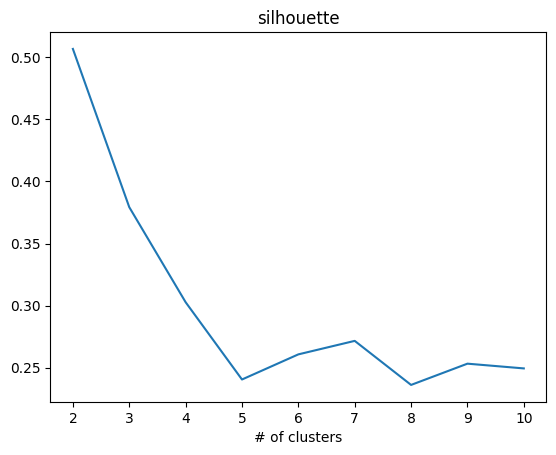

In [15]:
from sklearn import metrics, cluster
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#utilisation de la métrique "silhouette"
res = np.arange(9, dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage)
    res[k] = metrics.silhouette_score(fromage, km.labels_)
    print(res)

#graphique
fig, ax = plt.subplots()
ax.set_title("silhouette")
ax.set_xlabel("# of clusters")
ax.plot(np.arange(2, 11, 1), res)


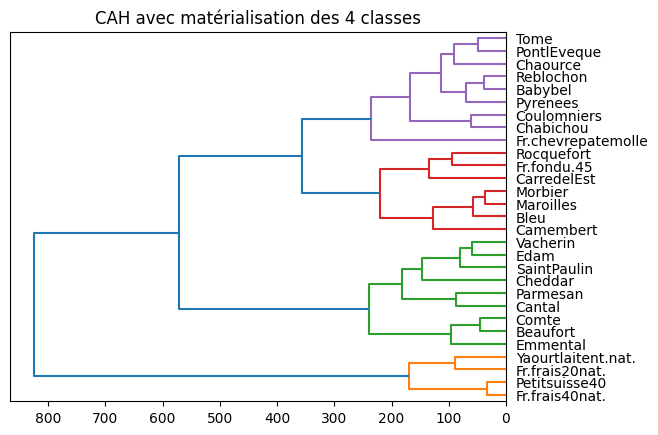

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [15]:
import pandas
import numpy as np
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(fromage,method='ward', metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

In [16]:
pandas.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,4,0,0,0
2,0,3,0,6
3,0,6,1,0
4,0,3,6,0


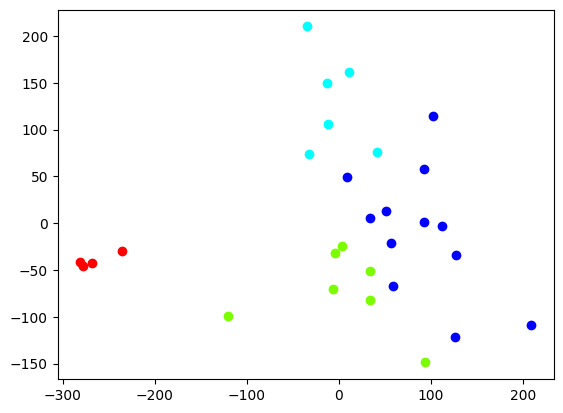

In [17]:
from sklearn.decomposition import PCA
acp = PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

In [12]:
# ========================================
# CAH AVEC SKLEARN - AgglomerativeClustering
# ========================================
# Comparaison avec la CAH de scipy en utilisant sklearn

from sklearn.cluster import AgglomerativeClustering

# Création du modèle CAH avec sklearn
# - n_clusters=4 : nombre de clusters souhaité
# - linkage='ward' : méthode de Ward (minimise la variance intra-cluster)
# - metric='euclidean' : distance euclidienne (par défaut avec Ward)

cah_sklearn = AgglomerativeClustering(n_clusters=4, linkage='ward')
groupes_sklearn = cah_sklearn.fit_predict(fromage)

# Affichage des résultats
print("=== CAH avec sklearn.cluster.AgglomerativeClustering ===\n")
idg_sklearn = np.argsort(groupes_sklearn)
print(pd.DataFrame({'Fromage': fromage.index[idg_sklearn], 'Groupe': groupes_sklearn[idg_sklearn]}))

# Comparaison avec CAH scipy
print("\n=== Comparaison CAH scipy vs CAH sklearn ===")
print(pd.crosstab(groupes_cah, groupes_sklearn, rownames=['CAH scipy'], colnames=['CAH sklearn']))

# Comparaison avec K-Means
print("\n=== Comparaison CAH sklearn vs K-Means ===")
print(pd.crosstab(groupes_sklearn, kmeans.labels_, rownames=['CAH sklearn'], colnames=['K-Means']))

=== CAH avec sklearn.cluster.AgglomerativeClustering ===

               Fromage  Groupe
0          SaintPaulin       0
1             Beaufort       0
2             Parmesan       0
3               Cantal       0
4              Cheddar       0
5                Comte       0
6             Vacherin       0
7                 Edam       0
8             Emmental       0
9          CarredelEst       1
10          Rocquefort       1
11             Morbier       1
12           Maroilles       1
13         Fr.fondu.45       1
14           Camembert       1
15                Bleu       1
16         Coulomniers       2
17            Chaource       2
18           Chabichou       2
19         PontlEveque       2
20            Pyrenees       2
21           Reblochon       2
22             Babybel       2
23                Tome       2
24  Fr.chevrepatemolle       2
25      Fr.frais20nat.       3
26      Fr.frais40nat.       3
27       Petitsuisse40       3
28  Yaourtlaitent.nat.       3

=== Compara

In [13]:
# ========================================
# ALGORITHME HIÉRARCHIQUE DESCENDANT (DIVISIVE CLUSTERING)
# ========================================
# Implémentation d'un clustering divisif basé sur K-Means
# Principe : On part d'un seul cluster contenant toutes les données,
# puis on divise récursivement le cluster avec la plus grande variance

def divisive_clustering(data, n_clusters):
    """
    Algorithme de clustering hiérarchique descendant (divisif)
    basé sur K-Means.
    
    Paramètres:
    -----------
    data : DataFrame - les données à clustériser
    n_clusters : int - nombre final de clusters souhaité
    
    Retourne:
    ---------
    labels : array - étiquettes de cluster pour chaque observation
    """
    from sklearn.cluster import KMeans
    
    # Initialisation : tous les points dans un seul cluster
    n_samples = len(data)
    labels = np.zeros(n_samples, dtype=int)
    current_n_clusters = 1
    
    print(f"Étape 0: 1 cluster contenant {n_samples} observations")
    
    while current_n_clusters < n_clusters:
        # Trouver le cluster avec la plus grande inertie (variance)
        max_inertia = -1
        cluster_to_split = 0
        
        for c in range(current_n_clusters):
            # Données du cluster c
            mask = labels == c
            cluster_data = data[mask]
            
            if len(cluster_data) < 2:
                continue
            
            # Calculer l'inertie (variance) du cluster
            centroid = cluster_data.mean()
            inertia = ((cluster_data - centroid) ** 2).sum().sum()
            
            if inertia > max_inertia:
                max_inertia = inertia
                cluster_to_split = c
        
        # Diviser le cluster sélectionné en 2 avec K-Means
        mask = labels == cluster_to_split
        cluster_data = data[mask]
        
        km = KMeans(n_clusters=2, random_state=42, n_init=10)
        sub_labels = km.fit_predict(cluster_data)
        
        # Mettre à jour les labels
        # Les points avec sub_label=0 gardent leur label
        # Les points avec sub_label=1 reçoivent le nouveau label
        new_label = current_n_clusters
        indices = np.where(mask)[0]
        
        for i, idx in enumerate(indices):
            if sub_labels[i] == 1:
                labels[idx] = new_label
        
        current_n_clusters += 1
        print(f"Étape {current_n_clusters-1}: Cluster {cluster_to_split} divisé → {current_n_clusters} clusters")
    
    return labels

# Application de l'algorithme divisif sur les données fromage
print("=== CLUSTERING HIÉRARCHIQUE DESCENDANT (DIVISIF) ===\n")
labels_divisif = divisive_clustering(fromage, n_clusters=4)

# Affichage des résultats
print("\n=== Résultats du clustering divisif ===")
idg_div = np.argsort(labels_divisif)
print(pd.DataFrame({'Fromage': fromage.index[idg_div], 'Groupe': labels_divisif[idg_div]}))

# Comparaison avec K-Means
print("\n=== Comparaison Divisif vs K-Means ===")
print(pd.crosstab(labels_divisif, kmeans.labels_, rownames=['Divisif'], colnames=['K-Means']))

# Comparaison avec CAH
print("\n=== Comparaison Divisif vs CAH scipy ===")
print(pd.crosstab(labels_divisif, groupes_cah, rownames=['Divisif'], colnames=['CAH']))

=== CLUSTERING HIÉRARCHIQUE DESCENDANT (DIVISIF) ===

Étape 0: 1 cluster contenant 29 observations
Étape 1: Cluster 0 divisé → 2 clusters
Étape 2: Cluster 0 divisé → 3 clusters
Étape 3: Cluster 2 divisé → 4 clusters

=== Résultats du clustering divisif ===
               Fromage  Groupe
0              Cheddar       0
1          SaintPaulin       0
2             Beaufort       0
3             Vacherin       0
4               Cantal       0
5             Parmesan       0
6             Emmental       0
7                 Edam       0
8                Comte       0
9   Fr.chevrepatemolle       1
10  Yaourtlaitent.nat.       1
11      Fr.frais20nat.       1
12       Petitsuisse40       1
13      Fr.frais40nat.       1
14             Morbier       2
15          Rocquefort       2
16           Maroilles       2
17         CarredelEst       2
18           Camembert       2
19                Bleu       2
20         Fr.fondu.45       2
21            Chaource       3
22           Chabichou       3